# 🚗 Car Price Prediction Using Random Forest Regression

This notebook implements a complete machine learning pipeline to predict car prices using Random Forest Regression.

---

## 1. Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load and Explore Dataset

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

print("📊 Dataset loaded successfully!")
print(f"\n🔢 Dataset Shape: {df.shape}")
print(f"   - Total Cars: {df.shape[0]}")
print(f"   - Total Features: {df.shape[1]}")

📊 Dataset loaded successfully!

🔢 Dataset Shape: (205, 26)
   - Total Cars: 205
   - Total Features: 26


In [3]:
# Display first few rows
print("\n📋 First 5 rows of the dataset:\n")
df.head()


📋 First 5 rows of the dataset:



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Dataset information
print("\n📝 Dataset Information:\n")
df.info()


📝 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        2

In [5]:
# Check for missing values
print("\n❓ Missing Values:\n")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing_values[missing_values > 0])


❓ Missing Values:

✅ No missing values found!


In [6]:
# Statistical summary
print("\n📈 Statistical Summary:\n")
df.describe()


📈 Statistical Summary:



,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Target variable distribution
print("\n💰 Target Variable (Price) Statistics:\n")
print(f"   - Mean Price: ${df['price'].mean():,.2f}")
print(f"   - Median Price: ${df['price'].median():,.2f}")
print(f"   - Min Price: ${df['price'].min():,.2f}")
print(f"   - Max Price: ${df['price'].max():,.2f}")
print(f"   - Std Dev: ${df['price'].std():,.2f}")


💰 Target Variable (Price) Statistics:

   - Mean Price: $13,276.71
   - Median Price: $10,295.00
   - Min Price: $5,118.00
   - Max Price: $45,400.00
   - Std Dev: $7,988.85


## 3. Data Preprocessing

In [8]:
# Create a copy for preprocessing
data = df.copy()

# Drop non-predictive columns
columns_to_drop = ['car_ID', 'CarName']
data = data.drop(columns=columns_to_drop)

print(f"✅ Dropped columns: {columns_to_drop}")
print(f"\n📊 Remaining features: {data.shape[1] - 1} (excluding target 'price')")

✅ Dropped columns: ['car_ID', 'CarName']

📊 Remaining features: 23 (excluding target 'price')


In [9]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('price')  # Remove target from features

print(f"\n🔤 Categorical Features ({len(categorical_cols)}): {categorical_cols}")
print(f"\n🔢 Numerical Features ({len(numerical_cols)}): {numerical_cols}")


🔤 Categorical Features (9): ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

🔢 Numerical Features (14): ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [10]:
# Encode categorical variables using One-Hot Encoding
print("\n🔄 Encoding categorical variables...")

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(f"✅ Encoding complete!")
print(f"   - Original features: {data.shape[1] - 1}")
print(f"   - Features after encoding: {data_encoded.shape[1] - 1}")


🔄 Encoding categorical variables...
✅ Encoding complete!
   - Original features: 23
   - Features after encoding: 43


In [11]:
# Separate features and target
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

print(f"\n✅ Features (X) shape: {X.shape}")
print(f"✅ Target (y) shape: {y.shape}")


✅ Features (X) shape: (205, 43)
✅ Target (y) shape: (205,)


## 4. Train-Test Split

In [12]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n📊 Data Split Summary:")
print(f"   - Training samples: {X_train.shape[0]} ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"   - Testing samples: {X_test.shape[0]} ({(X_test.shape[0]/len(X))*100:.1f}%)")
print(f"   - Total features: {X_train.shape[1]}")


📊 Data Split Summary:
   - Training samples: 164 (80.0%)
   - Testing samples: 41 (20.0%)
   - Total features: 43


## 5. Feature Scaling

In [13]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed using StandardScaler")
print(f"   - Training data scaled shape: {X_train_scaled.shape}")
print(f"   - Testing data scaled shape: {X_test_scaled.shape}")

✅ Feature scaling completed using StandardScaler
   - Training data scaled shape: (164, 43)
   - Testing data scaled shape: (41, 43)


## 6. Train Random Forest Regression Model

In [14]:
# Initialize Random Forest Regressor
print("\n🌲 Training Random Forest Regression Model...\n")

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

print("✅ Model training completed successfully!")
print(f"\n📋 Model Parameters:")
print(f"   - Number of trees: {rf_model.n_estimators}")
print(f"   - Max depth: {rf_model.max_depth}")
print(f"   - Min samples split: {rf_model.min_samples_split}")
print(f"   - Min samples leaf: {rf_model.min_samples_leaf}")


🌲 Training Random Forest Regression Model...

✅ Model training completed successfully!

📋 Model Parameters:
   - Number of trees: 100
   - Max depth: 15
   - Min samples split: 5
   - Min samples leaf: 2


## 7. Model Predictions

In [15]:
# Make predictions
y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)

print("✅ Predictions completed!")
print(f"   - Training predictions: {len(y_pred_train)}")
print(f"   - Testing predictions: {len(y_pred_test)}")

✅ Predictions completed!
   - Training predictions: 164
   - Testing predictions: 41


## 8. Model Evaluation - R² Score and Metrics

### 🎯 PRIMARY METRIC: R² Score

In [16]:
# Calculate R² Score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("="*60)
print("🎯 R² SCORE (Coefficient of Determination)")
print("="*60)
print(f"\n   Training R² Score:   {r2_train:.4f} ({r2_train*100:.2f}%)")
print(f"   Testing R² Score:    {r2_test:.4f} ({r2_test*100:.2f}%)")
print("\n" + "="*60)

# Interpretation
if r2_test >= 0.9:
    interpretation = "🌟 EXCELLENT - Model explains over 90% of variance!"
elif r2_test >= 0.8:
    interpretation = "✨ VERY GOOD - Strong predictive performance!"
elif r2_test >= 0.7:
    interpretation = "✅ GOOD - Decent predictive capability!"
elif r2_test >= 0.6:
    interpretation = "⚠️ FAIR - Moderate predictive performance"
else:
    interpretation = "❌ POOR - Model needs improvement"

print(f"\n📊 Interpretation: {interpretation}")
print("="*60)

🎯 R² SCORE (Coefficient of Determination)

   Training R² Score:   0.9734 (97.34%)
   Testing R² Score:    0.9532 (95.32%)


📊 Interpretation: 🌟 EXCELLENT - Model explains over 90% of variance!


### 📊 Additional Performance Metrics

In [17]:
# Calculate additional metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("\n📈 COMPREHENSIVE MODEL PERFORMANCE METRICS")
print("="*60)
print(f"\n{'Metric':<30} {'Training':<15} {'Testing'}")
print("-"*60)
print(f"{'R² Score':<30} {r2_train:<15.4f} {r2_test:.4f}")
print(f"{'MAE (Mean Absolute Error)':<30} ${mae_train:<14,.2f} ${mae_test:,.2f}")
print(f"{'MSE (Mean Squared Error)':<30} ${mse_train:<14,.2f} ${mse_test:,.2f}")
print(f"{'RMSE (Root Mean Squared Error)':<30} ${rmse_train:<14,.2f} ${rmse_test:,.2f}")
print("="*60)

# Model generalization check
overfitting_gap = r2_train - r2_test
print(f"\n🔍 Overfitting Check:")
print(f"   - R² Gap (Train - Test): {overfitting_gap:.4f}")
if overfitting_gap < 0.05:
    print("   - Status: ✅ Model generalizes well!")
elif overfitting_gap < 0.1:
    print("   - Status: ⚠️ Slight overfitting")
else:
    print("   - Status: ❌ Significant overfitting detected")


📈 COMPREHENSIVE MODEL PERFORMANCE METRICS

Metric                         Training        Testing
------------------------------------------------------------
R² Score                       0.9734          0.9532
MAE (Mean Absolute Error)      $787.32         $1,361.60
MSE (Mean Squared Error)       $1,584,473.22   $3,692,304.27
RMSE (Root Mean Squared Error) $1,258.76       $1,921.54

🔍 Overfitting Check:
   - R² Gap (Train - Test): 0.0202
   - Status: ✅ Model generalizes well!


## 9. Visualizations

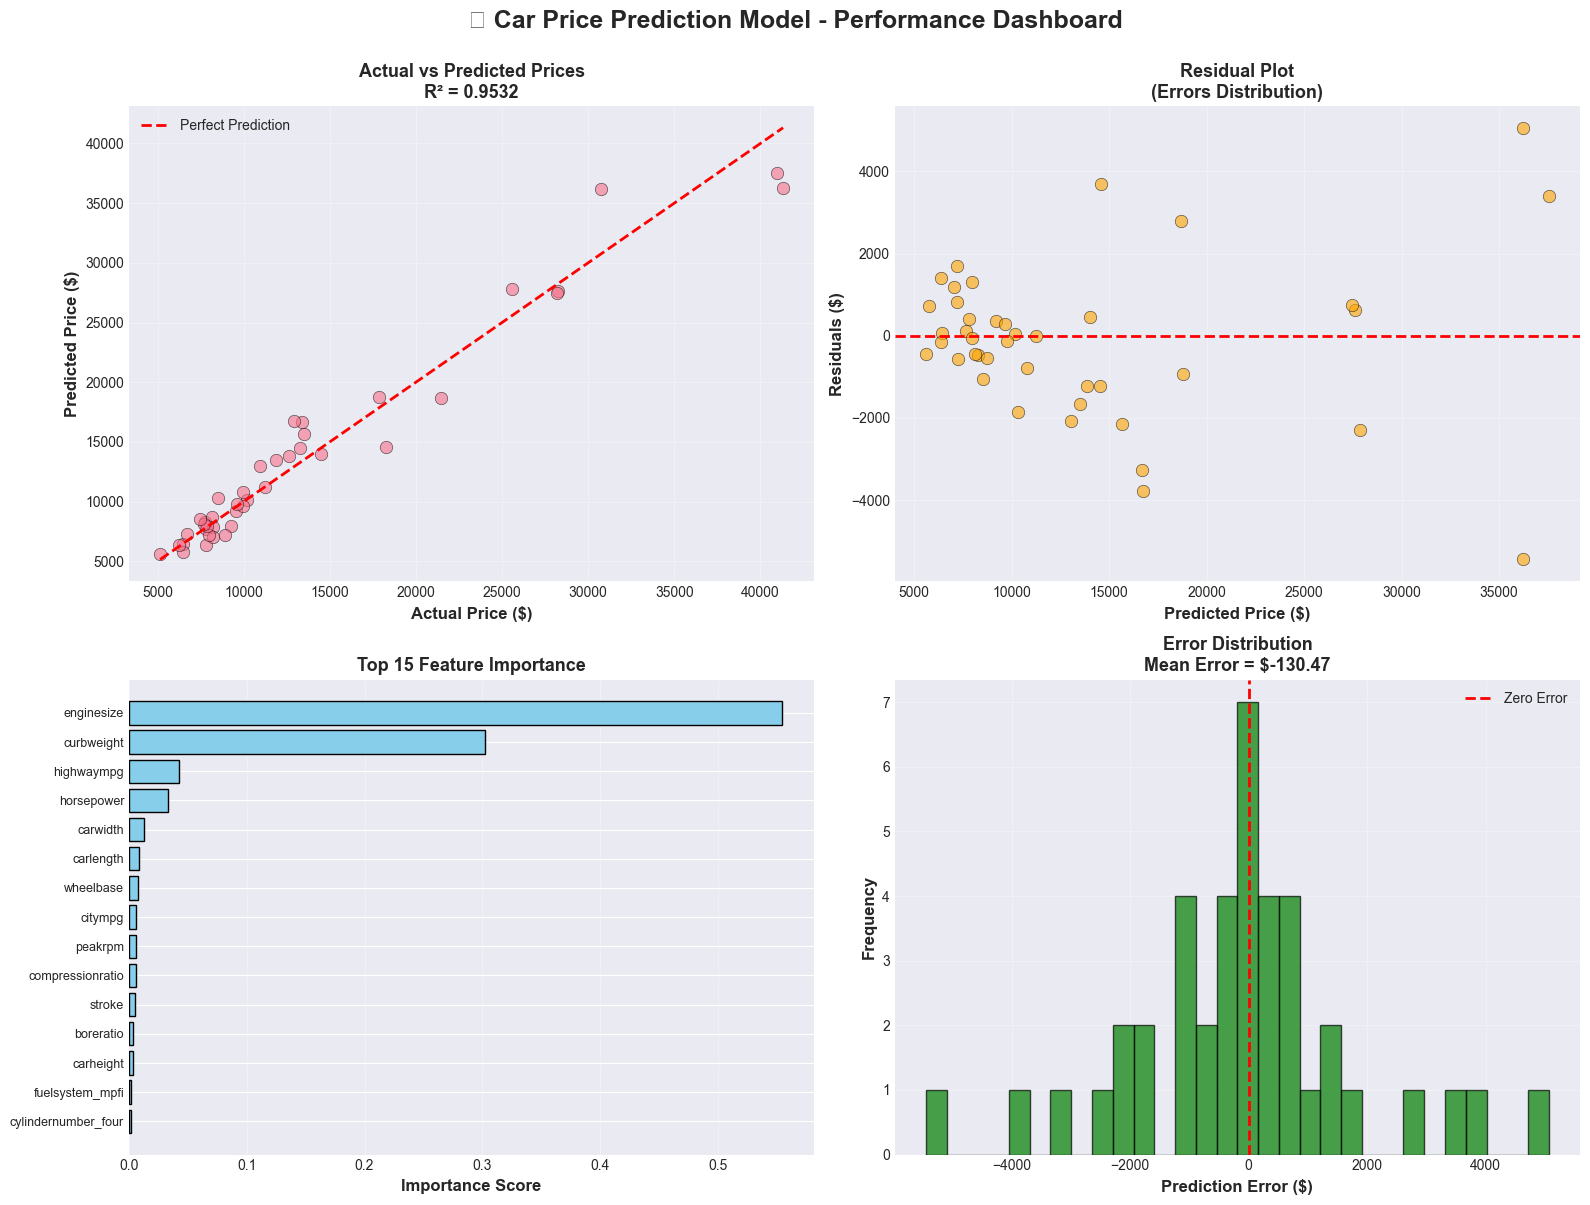


✅ All visualizations generated successfully!


In [18]:
# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🚗 Car Price Prediction Model - Performance Dashboard', fontsize=18, fontweight='bold', y=1.00)

# 1. Actual vs Predicted (Test Set)
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.6, s=80, edgecolors='black', linewidth=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price ($)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Predicted Price ($)', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Actual vs Predicted Prices\nR² = {r2_test:.4f}', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual Plot
residuals = y_test - y_pred_test
axes[0, 1].scatter(y_pred_test, residuals, alpha=0.6, s=80, edgecolors='black', linewidth=0.5, color='orange')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price ($)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Residuals ($)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Residual Plot\n(Errors Distribution)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Top 15 Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[1, 0].barh(range(len(feature_importance)), feature_importance['importance'], color='skyblue', edgecolor='black')
axes[1, 0].set_yticks(range(len(feature_importance)))
axes[1, 0].set_yticklabels(feature_importance['feature'], fontsize=9)
axes[1, 0].set_xlabel('Importance Score', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Top 15 Feature Importance', fontsize=13, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, axis='x', alpha=0.3)

# 4. Error Distribution
axes[1, 1].hist(residuals, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[1, 1].set_xlabel('Prediction Error ($)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 1].set_title(f'Error Distribution\nMean Error = ${residuals.mean():.2f}', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ All visualizations generated successfully!")

## 10. Sample Predictions

In [19]:
# Display sample predictions
sample_results = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_pred_test[:10],
    'Difference': y_test.values[:10] - y_pred_test[:10],
    'Error %': np.abs((y_test.values[:10] - y_pred_test[:10]) / y_test.values[:10] * 100)
})

print("\n🎯 Sample Predictions (First 10 Test Cases):")
print("="*80)
print(sample_results.to_string(index=False))
print("="*80)


🎯 Sample Predictions (First 10 Test Cases):
 Actual Price  Predicted Price   Difference   Error %
    30760.000     36207.834790 -5447.834790 17.710776
    17859.167     18800.493020  -941.326020  5.270828
     9549.000      9184.579912   364.420088  3.816317
    11850.000     13522.955254 -1672.955254 14.117766
    28248.000     27612.008532   635.991468  2.251457
     7799.000      6395.542151  1403.457849 17.995356
     7788.000      7681.249345   106.750655  1.370707
     9258.000      7948.245202  1309.754798 14.147276
    10198.000     10148.355269    49.644731  0.486808
     7775.000      8252.293960  -477.293960  6.138829


## 11. Prediction Function for New Cars

In [20]:
def predict_car_price(model, scaler, feature_names, car_features_dict):
    """
    Predict car price for a new car based on its features.
    
    Parameters:
    - model: trained Random Forest model
    - scaler: fitted StandardScaler
    - feature_names: list of feature names from training
    - car_features_dict: dictionary with car features
    
    Returns:
    - predicted price
    """
    # Create a DataFrame with the same features as training data
    input_df = pd.DataFrame([car_features_dict])
    
    # Ensure all features are present (fill missing with 0)
    for feature in feature_names:
        if feature not in input_df.columns:
            input_df[feature] = 0
    
    # Reorder columns to match training data
    input_df = input_df[feature_names]
    
    # Scale the features
    input_scaled = scaler.transform(input_df)
    
    # Make prediction
    predicted_price = model.predict(input_scaled)[0]
    
    return predicted_price

print("✅ Prediction function created successfully!")

✅ Prediction function created successfully!


In [21]:
# Example: Predict price for a sample car from test set
sample_index = 0
sample_features = X_test.iloc[sample_index].to_dict()
actual_price = y_test.iloc[sample_index]

predicted_price = predict_car_price(rf_model, scaler, X.columns.tolist(), sample_features)

print("\n🔍 Example Prediction:")
print("="*60)
print(f"Actual Price:     ${actual_price:,.2f}")
print(f"Predicted Price:  ${predicted_price:,.2f}")
print(f"Difference:       ${abs(actual_price - predicted_price):,.2f}")
print(f"Error Percentage: {abs((actual_price - predicted_price) / actual_price * 100):.2f}%")
print("="*60)


🔍 Example Prediction:
Actual Price:     $30,760.00
Predicted Price:  $36,207.83
Difference:       $5,447.83
Error Percentage: 17.71%


## 🎯 Final Summary

In [22]:
print("\n" + "="*70)
print("🏆 CAR PRICE PREDICTION PROJECT SUMMARY")
print("="*70)
print(f"\n📊 Dataset Information:")
print(f"   • Total Cars: {df.shape[0]}")
print(f"   • Features Used: {X.shape[1]}")
print(f"   • Training Samples: {X_train.shape[0]}")
print(f"   • Testing Samples: {X_test.shape[0]}")
print(f"\n🤖 Model: Random Forest Regression")
print(f"   • Number of Trees: {rf_model.n_estimators}")
print(f"   • Max Depth: {rf_model.max_depth}")
print(f"\n🎯 PRIMARY METRIC - R² SCORE:")
print(f"   • Training R²:  {r2_train:.4f} ({r2_train*100:.2f}%)")
print(f"   • Testing R²:   {r2_test:.4f} ({r2_test*100:.2f}%) ⭐")
print(f"\n📈 Other Performance Metrics:")
print(f"   • MAE (Test):   ${mae_test:,.2f}")
print(f"   • RMSE (Test):  ${rmse_test:,.2f}")
print(f"\n💡 What R² Score Means:")
print(f"   The model explains {r2_test*100:.2f}% of the variance in car prices.")
print(f"   {interpretation}")
print("\n" + "="*70)
print("✅ PROJECT COMPLETED SUCCESSFULLY!")
print("="*70)


🏆 CAR PRICE PREDICTION PROJECT SUMMARY

📊 Dataset Information:
   • Total Cars: 205
   • Features Used: 43
   • Training Samples: 164
   • Testing Samples: 41

🤖 Model: Random Forest Regression
   • Number of Trees: 100
   • Max Depth: 15

🎯 PRIMARY METRIC - R² SCORE:
   • Training R²:  0.9734 (97.34%)
   • Testing R²:   0.9532 (95.32%) ⭐

📈 Other Performance Metrics:
   • MAE (Test):   $1,361.60
   • RMSE (Test):  $1,921.54

💡 What R² Score Means:
   The model explains 95.32% of the variance in car prices.
   🌟 EXCELLENT - Model explains over 90% of variance!

✅ PROJECT COMPLETED SUCCESSFULLY!
